In [42]:
import numpy as np

def dft2(img):
    img_dft = np.fft.fftshift(img)
    img_dft = np.fft.fft2(img_dft)
    img_dft = np.fft.fftshift(img_dft)
    return img_dft

def idft2(img_dft):
    img_idft = np.fft.fftshift(img_dft)
    img_idft = np.fft.ifft2(img_idft)
    img_idft = np.fft.fftshift(img_idft)
    return img_idft

def gaussian2d(N, sigma):
    x_indice = np.linspace(start=-N//2,stop=N//2-1,num=N)
    y_indice = x_indice
    grid_x, grid_y = np.meshgrid(x_indice, y_indice)
    rad_square = np.square(grid_x) + np.square(grid_y)
    return np.exp(-rad_square/(2.0*sigma**2))


In [43]:
import cv2
img = cv2.imread("LENNA.bmp", 0)     # type: np.ndarray

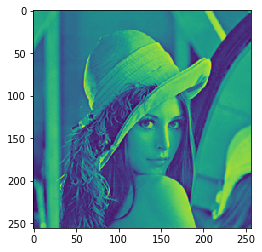

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

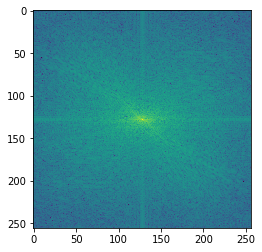

In [45]:
img_dft = dft2(img)
plt.imshow(np.log10(np.abs(img_dft)))

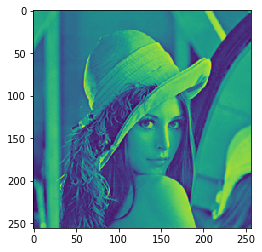

In [46]:
img_idft = idft2(img_dft)
plt.imshow(np.abs(img_idft))

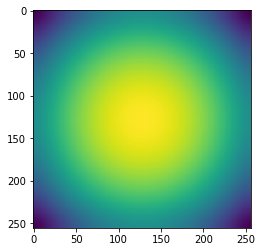

In [47]:
gauss_2d = gaussian2d(N=256, sigma=1)
gauss_2d = dft2(gauss_2d)
plt.imshow(np.log10(np.abs(gauss_2d)))

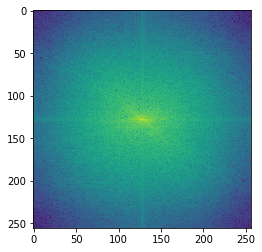

In [48]:
img_conv_dft = img_dft*gauss_2d
plt.imshow(np.log10(np.abs(img_conv_dft)))

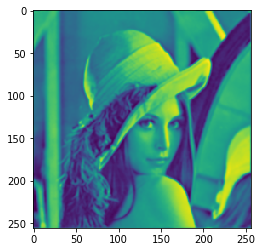

In [49]:
img_conv_idft = idft2(img_conv_dft)
plt.imshow(np.abs(img_conv_idft))

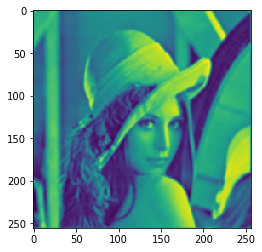

In [50]:
diff_conv = img - np.abs(img_conv_idft)
plt.imshow(np.abs(diff_conv))

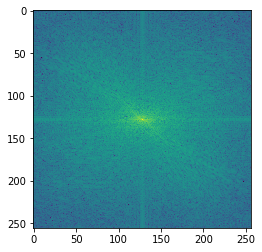

In [51]:
img_deconv_dft = img_conv_dft/gauss_2d
plt.imshow(np.log10(np.abs(img_deconv_dft)))

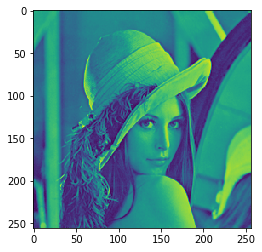

In [52]:
img_deconv_idft = idft2(img_deconv_dft)
plt.imshow(np.abs(img_deconv_idft))

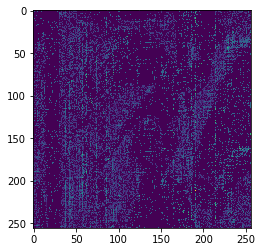

In [53]:
diff_deconv = np.abs(img - np.abs(img_deconv_idft))
plt.imshow(np.abs(diff_deconv))